## Procesing GNSS data for multiple receivers & producing VOD

### Step 1: Load libraries

This chunk imports libraries with important modules & sets the working environment where the jupyterlab notebook file is imported to.

In [2]:
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

### Step 2: Time intervals

Choose the interval you want to pull data from (the study period). Input the start date in dd-mm-yyyy format. Use periods= to select the number of days from the start day you want data from.

In [3]:
startday = pd.to_datetime('21-03-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=11, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-03-21 00:00:00, 2025-03-22 00:00:00),
               [2025-03-22 00:00:00, 2025-03-23 00:00:00),
               [2025-03-23 00:00:00, 2025-03-24 00:00:00),
               [2025-03-24 00:00:00, 2025-03-25 00:00:00),
               [2025-03-25 00:00:00, 2025-03-26 00:00:00),
               [2025-03-26 00:00:00, 2025-03-27 00:00:00),
               [2025-03-27 00:00:00, 2025-03-28 00:00:00),
               [2025-03-28 00:00:00, 2025-03-29 00:00:00),
               [2025-03-29 00:00:00, 2025-03-30 00:00:00),
               [2025-03-30 00:00:00, 2025-03-31 00:00:00),
               [2025-03-31 00:00:00, 2025-04-01 00:00:00)],
              dtype='interval[datetime64[ns], left]')

### Step 3: Read RINEX files

We then proceed to read the RINEX files. Indicate the location of observation (.*O) files using the pattern= row, and the location of the your output folder (for .nc files) using the outputdir= row. Sometimes we could get the following error:

ValueError: Missing an approximate antenna position. Provide the argument ‘approx_position’ to preprocess()

* Make sure to update to your own path. 

We only need to keep the S* variables to calculate VOD.
Increase or decrease the interval to change the number of observations kept, but keeping it around 15 seconds is recommended.

In [ ]:
# option for batch processing, example with my files- again, approx-position is for an error
#batch processing for one station
pattern= {'YoungPine-2':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/youngpine/youngpine_pheno/*.*O'}
outputdir={'YoungPine-2':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/youngpine/youngpine_pheno/youngpine_pheno_nc/'  }
#approx_position=[2481170.8276 -5525721.2902,1992311.7021 ]
keepvars=['S?','S??']
#gv.preprocess(pattern,interval='15s',keepvars=keepvars,outputdir=outputdir,approx_position=approx_position)
gv.preprocess(pattern,interval='15s',keepvars=keepvars,outputdir=outputdir)

If an observation file has already been processed into a .nc file in the output folder, it will be automatically skipped unless you pass overwrite=True

Continue this next portion in a separate folder, we call ours gnss_gathering. Name and provide the paths for all of the .nc folders you want to calculate VOD from.

This section will not run if one of the .nc folders mentioned in your path is empty, even if its not listed as one of the sensors you're concatenating. 

In [4]:
#pairing and concatenating--- starting by establishing path to .nc files per station, replace with own path 
pattern={'YoungPine-1':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/youngpine/youngpine_tower/youngpine_tower_nc/*.nc',
        'YoungPine-2':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/youngpine/youngpine_pheno/youngpine_pheno_nc/*.nc',
        'MaturePine-2':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/maturepine/maturepine_footprint/maturepine_footprint_nc/*.nc'}

In [5]:
#re-establish time intervals - this will be necessary when you want to look at a specific period of data. 
startday = pd.to_datetime('20-03-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=5, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-03-20 00:00:00, 2025-03-21 00:00:00),
               [2025-03-21 00:00:00, 2025-03-22 00:00:00),
               [2025-03-22 00:00:00, 2025-03-23 00:00:00),
               [2025-03-23 00:00:00, 2025-03-24 00:00:00),
               [2025-03-24 00:00:00, 2025-03-25 00:00:00)],
              dtype='interval[datetime64[ns], left]')

In [ ]:
#concatenating. Reference station always goes first. Replace with your own device path & sensor pairings

# YoungPine
pairings={'YoungPine':('YoungPine-1','YoungPine-2')}
outputdir={'YoungPine':'/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/'}
keepvars=['S?','S??','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,outputresult=True,outputdir=outputdir)
out

Extracting Epochs from files
----- Processing YoungPine
-- Processing interval [2025-03-20 00:00:00, 2025-03-21 00:00:00)
Found 0 file(s) for YoungPine-1
No data for station YoungPine-1.
Found 2 file(s) for YoungPine-2
Reading
Concatenating stations
Saving result in /Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/
Saved 204713 observations in YoungPine_20250320000000_20250321000000.nc
-- Processing interval [2025-03-21 00:00:00, 2025-03-22 00:00:00)
Found 1 file(s) for YoungPine-1
Reading
Found 2 file(s) for YoungPine-2
Reading
Concatenating stations
Saving result in /Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/
Saved 243537 observations in YoungPine_20250321000000_20250322000000.nc
-- Processing interval [2025-03-22 00:00:00, 2025-03-23 00:00:00)
Found 2 file(s) for YoungPine-1
Reading
Found 2 file(s) for YoungPine-2
Reading
Concatenating stations
Saving result in /Users/coopercollins/Box/Project_Metoli

{'YoungPine':                                       S1C  S1X   S2C   S2I  S2X   S7I  S7X  \
 Station     Epoch               SV                                           
 YoungPine-2 2025-03-20 00:00:00 C11   NaN  NaN   NaN  44.0  NaN  43.0  NaN   
                                 C12   NaN  NaN   NaN  42.7  NaN  41.0  NaN   
                                 C19   NaN  NaN   NaN  26.3  NaN   NaN  NaN   
                                 C21   NaN  NaN   NaN  41.7  NaN   NaN  NaN   
                                 C22   NaN  NaN   NaN  48.3  NaN   NaN  NaN   
 ...                                   ...  ...   ...   ...  ...   ...  ...   
             2025-03-24 23:59:45 R11  45.0  NaN  38.1   NaN  NaN   NaN  NaN   
                                 R18  30.4  NaN   NaN   NaN  NaN   NaN  NaN   
                                 R19  33.7  NaN  39.0   NaN  NaN   NaN  NaN   
                                 R20  39.0  NaN  41.3   NaN  NaN   NaN  NaN   
                                 R21  3

The portion below I adapt for different station pairings

In [10]:
#
ds=xr.open_mfdataset('/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/*.nc',combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 485MB
Dimensions:    (Station: 2, Epoch: 28800, SV: 117)
Coordinates:
  * Station    (Station) <U11 88B 'YoungPine-1' 'YoungPine-2'
  * SV         (SV) <U3 1kB 'C06' 'C07' 'C08' 'C09' ... 'R21' 'R22' 'R23' 'R24'
  * Epoch      (Epoch) datetime64[ns] 230kB 2025-03-20 ... 2025-03-24T23:59:45
Data variables:
    S1C        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S2I        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S7I        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    S7X        (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 54MB dask.array<chunksize=(1, 5760, 115), meta=np.ndarray>

In [11]:
#
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

S1C  S1X   S2C   S2I  S2X  S7I  S7X  \
Station     Epoch               SV                                          
YoungPine-1 2025-03-21 19:43:30 C27   NaN  NaN   NaN  49.0  NaN  NaN  NaN   
                                C28   NaN  NaN   NaN  42.0  NaN  NaN  NaN   
                                C29   NaN  NaN   NaN  40.0  NaN  NaN  NaN   
                                C30   NaN  NaN   NaN  49.0  NaN  NaN  NaN   
                                C36   NaN  NaN   NaN  48.0  NaN  NaN  NaN   
...                                   ...  ...   ...   ...  ...  ...  ...   
YoungPine-2 2025-03-24 23:59:45 R11  45.0  NaN  38.1   NaN  NaN  NaN  NaN   
                                R18  30.4  NaN   NaN   NaN  NaN  NaN  NaN   
                                R19  33.7  NaN  39.0   NaN  NaN  NaN  NaN   
                                R20  39.0  NaN  41.3   NaN  NaN  NaN  NaN   
                                R21  31.2  NaN   NaN   NaN  NaN  NaN  NaN   

                                     Azimuth  Elevation  
Station     Epoch               SV                       
YoungPine-1 2025-03-21 19:43:30 C27     55.6       56.3  
                                C28     50.1       12.6  
                                C29   -131.2       13.4  
                                C30   -138.2       67.3  
                                C36    -66.1       61.0  
...                                      ...        ...  
YoungPine-2 2025-03-24 23:59:45 R11    -40.3       25.3  
                                R18     84.7        3.0  
                                R19     63.0       37.5  
                                R20    -42.6       53.2  
                                R21    -77.8       10.3  

[1737542 rows x 9 columns]

In [12]:
hemi = gv.hemibuild(4)
hemi

In [13]:
hemi.grid

,azi,ele,azimin,azimax,elemin,elemax
CellID,,,,,,
0,0.000000,90.0,0.000000,360.000000,88.0,90.0
1,22.500000,86.0,0.000000,45.000000,84.0,88.0
2,67.500000,86.0,45.000000,90.000000,84.0,88.0
3,112.500000,86.0,90.000000,135.000000,84.0,88.0
4,157.500000,86.0,135.000000,180.000000,84.0,88.0
...,...,...,...,...,...,...
1523,345.789474,6.0,344.210526,347.368421,4.0,8.0
1524,348.947368,6.0,347.368421,350.526316,4.0,8.0
1525,352.105263,6.0,350.526316,353.684211,4.0,8.0


In [14]:
# get patches
patches = hemi.patches() 
patches

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

In [15]:
newdf = hemi.add_CellID(df)
newdf

S1C  S1X   S2C   S2I  S2X  S7I  S7X  \
Station     Epoch               SV                                          
YoungPine-1 2025-03-21 19:43:30 C27   NaN  NaN   NaN  49.0  NaN  NaN  NaN   
                                C28   NaN  NaN   NaN  42.0  NaN  NaN  NaN   
                                C29   NaN  NaN   NaN  40.0  NaN  NaN  NaN   
                                C30   NaN  NaN   NaN  49.0  NaN  NaN  NaN   
                                C36   NaN  NaN   NaN  48.0  NaN  NaN  NaN   
...                                   ...  ...   ...   ...  ...  ...  ...   
YoungPine-2 2025-03-24 23:59:45 R09  40.5  NaN  39.7   NaN  NaN  NaN  NaN   
                                R11  45.0  NaN  38.1   NaN  NaN  NaN  NaN   
                                R19  33.7  NaN  39.0   NaN  NaN  NaN  NaN   
                                R20  39.0  NaN  41.3   NaN  NaN  NaN  NaN   
                                R21  31.2  NaN   NaN   NaN  NaN  NaN  NaN   

                                     Azimuth  Elevation  CellID  
Station     Epoch               SV                               
YoungPine-1 2025-03-21 19:43:30 C27     55.6       56.3     230  
                                C28     50.1       12.6    1205  
                                C29   -131.2       13.4    1260  
                                C30   -138.2       67.3     148  
                                C36    -66.1       61.0     211  
...                                      ...        ...     ...  
YoungPine-2 2025-03-24 23:59:45 R09   -145.6       15.3    1256  
                                R11    -40.3       25.3     963  
                                R19     63.0       37.5     603  
                                R20    -42.6       53.2     341  
                                R21    -77.8       10.3    1389  

[1603355 rows x 10 columns]

In [16]:
hemi_average = newdf.groupby(['CellID','Station']).mean()
hemi_average

S1C        S1X        S2C        S2I        S2X  \
CellID Station                                                              
0      YoungPine-1  38.963158  46.015122  40.536842  48.238462        NaN   
       YoungPine-2  35.047368  45.922222  39.126316  48.162150        NaN   
1      YoungPine-1  48.203704  45.824779        NaN  48.202941  43.229630   
       YoungPine-2  48.665556  45.244651        NaN  47.317470  42.524444   
2      YoungPine-1  48.202062  45.907895  42.066667  48.662500  43.247826   
...                       ...        ...        ...        ...        ...   
1525   YoungPine-2  29.659611        NaN  29.017391        NaN        NaN   
1526   YoungPine-1  42.662933        NaN  38.259078        NaN        NaN   
       YoungPine-2  26.419537        NaN  23.609038        NaN        NaN   
1527   YoungPine-1  41.765759        NaN  37.570435        NaN        NaN   
       YoungPine-2  26.611263        NaN  27.123346        NaN        NaN   

                          S7I        S7X    Azimuth  Elevation  
CellID Station                                                  
0      YoungPine-1  41.940909  40.826829  -8.585559  88.766485  
       YoungPine-2  42.833333  40.233333  -1.518290  88.731412  
1      YoungPine-1  42.604348  40.742478  20.591822  86.170632  
       YoungPine-2  43.101887  40.653023  20.798301  86.152866  
2      YoungPine-1        NaN  40.744737  75.810929  85.540984  
...                       ...        ...        ...        ...  
1525   YoungPine-2        NaN        NaN  -7.887470   5.467376  
1526   YoungPine-1        NaN        NaN  -4.798933   4.846933  
       YoungPine-2        NaN        NaN  -4.794189   4.873366  
1527   YoungPine-1        NaN        NaN  -1.674319   4.862646  
       YoungPine-2        NaN        NaN  -1.643813   4.832776  

[2714 rows x 9 columns]

In [17]:
# set which data files should be loaded
pattern = '/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'YoungPine':('YoungPine-1','YoungPine-2')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod = gv.calc_vod(pattern,pairings,bands)
vod = vod['YoungPine']
vod

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2025-03-21 19:43:30 C27       NaN       NaN     55.6       56.3
                    C28       NaN       NaN     50.1       12.6
                    C29       NaN       NaN   -131.2       13.4
                    C30       NaN       NaN   -138.2       67.3
                    C36       NaN       NaN    -66.1       61.0
...                           ...       ...      ...        ...
2025-03-24 23:59:45 R11  0.226326  0.383771    -40.3       25.3
                    R18  0.112072       NaN     84.7        3.0
                    R19  0.644793  0.042052     63.0       37.5
                    R20 -0.000000  0.387188    -42.6       53.2
                    R21  0.601093       NaN    -77.8       10.3

[647431 rows x 4 columns]

In [18]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod = hemi.add_CellID(vod)
# get average value per grid cell
vod_avg = vod.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count
CellID,,,,,,,,,,,,
0,0.094538,0.139737,85,NaN,NaN,0,-5.033636,100.224674,110,89.372727,0.242279,110
1,-0.136371,0.169593,110,0.159254,0.147399,51,20.362338,12.320105,154,87.865584,0.493272,154
2,-0.329773,0.327237,60,0.312484,0.129094,43,69.598750,12.913064,80,88.043750,0.397729,80
3,-0.508889,0.127358,24,0.382769,0.094881,14,108.627632,12.821270,76,87.722368,0.533566,76
4,0.314346,0.138842,56,NaN,NaN,0,156.574576,11.768523,59,87.959322,0.581946,59
...,...,...,...,...,...,...,...,...,...,...,...,...
6431,0.129517,0.043093,101,0.139066,0.050357,58,-26.116800,0.429879,125,2.648000,0.254191,125
6432,0.245960,0.049559,3,0.138351,NaN,1,-25.066667,0.057735,3,2.766667,0.057735,3
6445,NaN,NaN,0,0.178883,0.021629,11,-4.100000,0.331662,11,2.772727,0.167874,11


In [19]:
# merge statistics with the original VOD measurements
vod_anom = vod.join(vod_avg,on='CellID')

In [20]:
vod_anom['VOD1_anom'] = vod_anom['VOD1']-vod_anom['VOD1_mean']
vod_anom['VOD2_anom'] = vod_anom['VOD2']-vod_anom['VOD2_mean']

In [21]:
vod_ts = vod_anom.groupby(pd.Grouper(freq='1h', level='Epoch')).mean()
vod_ts

,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,
2025-03-21 19:00:00,0.504765,0.512424,26.813949,32.865127,3339.369408,0.460028,0.239154,141.365560,0.491667,0.206595,74.165464,26.839376,0.648984,183.776335,32.858341,0.539591,183.776335,-0.002155,-0.022980
2025-03-21 20:00:00,0.480950,0.461935,8.224799,35.984993,3066.609985,0.410377,0.248441,144.223398,0.472513,0.206426,84.414456,8.229412,0.790738,184.335917,35.977780,0.548720,184.335917,0.030270,-0.010011
2025-03-21 21:00:00,0.414167,0.352775,10.643840,34.771092,3162.903069,0.402194,0.243378,145.505353,0.420153,0.199582,81.028408,10.439758,1.011186,194.976017,34.758659,0.542112,194.976017,0.003608,0.008553
2025-03-21 22:00:00,0.386983,0.432505,-1.377680,32.205609,3341.006771,0.380940,0.236148,158.828159,0.440052,0.202627,103.916826,-1.351037,0.604128,214.500958,32.173262,0.537495,214.500958,0.003632,-0.004204
2025-03-21 23:00:00,0.405837,0.520389,1.898391,30.870075,3458.223642,0.427226,0.248721,160.948053,0.524904,0.221719,105.138327,1.900819,0.640156,209.969708,30.826168,0.547538,209.969708,-0.004836,-0.005790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24 19:00:00,0.546273,0.489372,12.008844,37.892377,2902.118336,0.497137,0.270731,135.360737,0.583618,0.224545,80.744644,12.806152,2.118455,171.517688,37.898783,0.549019,171.517688,0.014699,-0.037414
2025-03-24 20:00:00,0.430646,0.431288,-2.588995,37.826319,2943.306789,0.376622,0.241992,147.675849,0.481759,0.210207,86.459399,-1.975543,1.630078,194.408225,37.824771,0.552450,194.408225,0.026210,-0.011474
2025-03-24 21:00:00,0.455837,0.346021,12.695609,36.756627,2962.967302,0.391844,0.252444,151.177949,0.459468,0.215613,88.369545,11.197856,3.579139,194.478989,36.745379,0.543712,194.478989,0.016092,-0.030894


In [22]:
#i export vod_anom because it is what we use for plotting moving forward.
vod_anom=vod_anom.reset_index()
vod_anom.to_csv('/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/gnss_gathering/yp_pheno_vod/yp_pheno_vod.csv', index=False)

## Graphing VOD results in a hemisphere

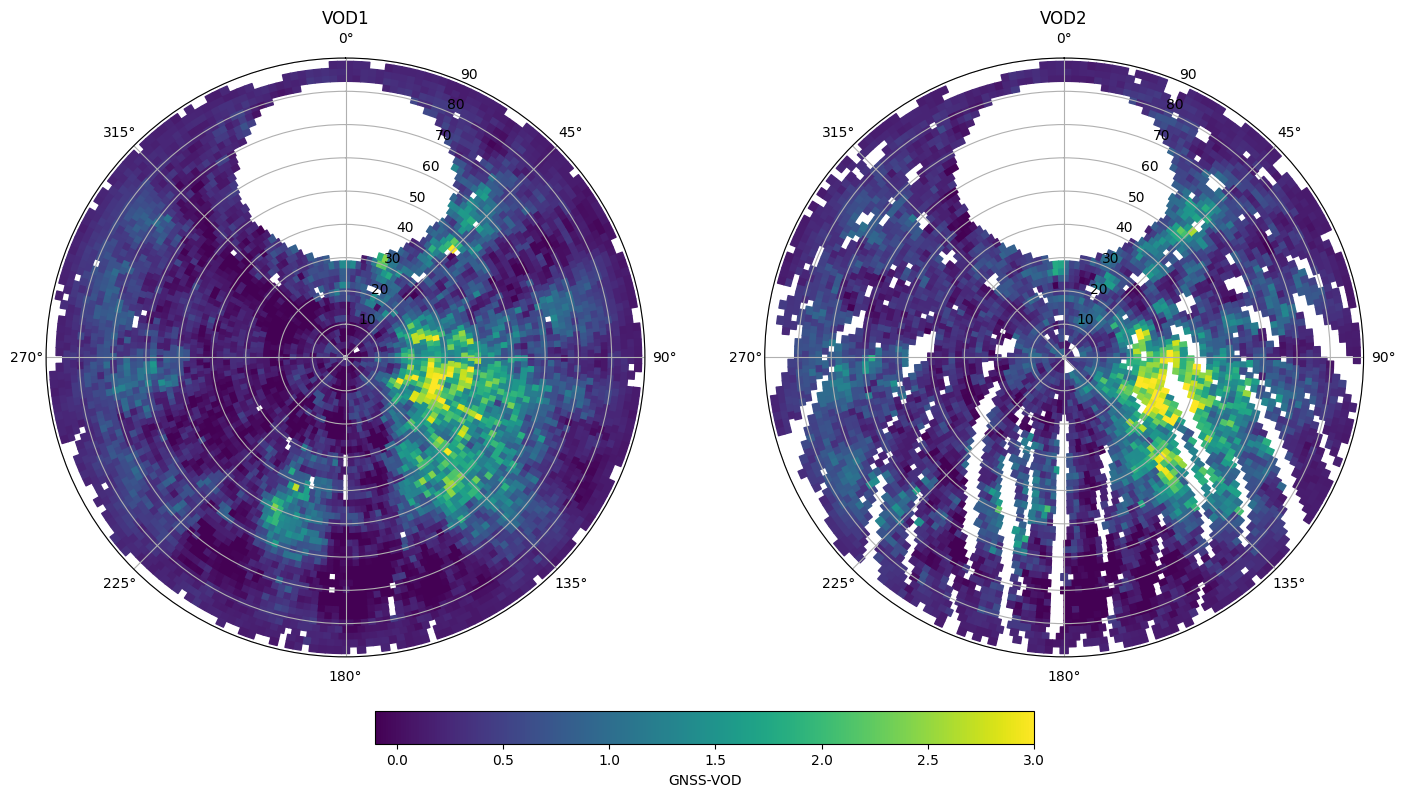

In [24]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

To only plot the average VOD:

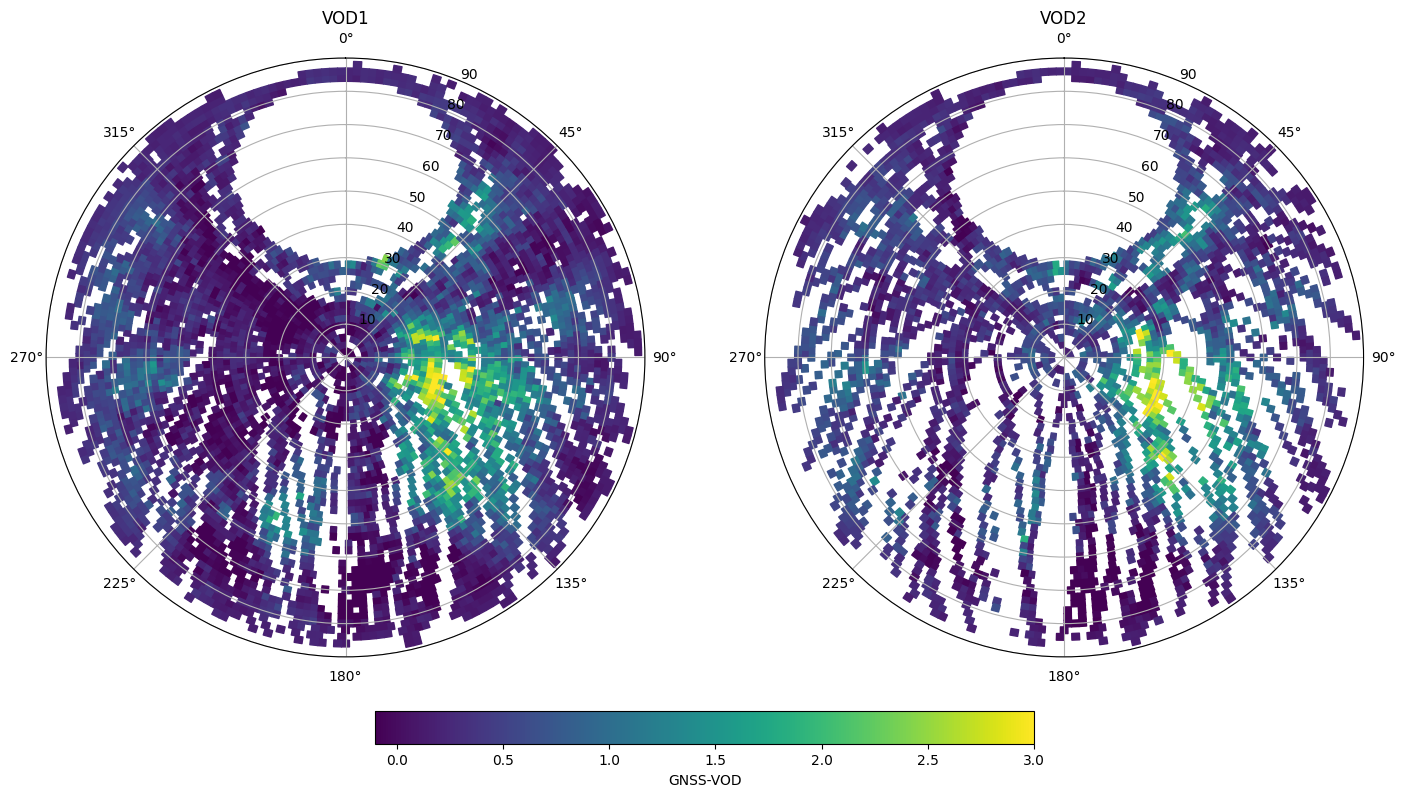

In [25]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"]>40)
    ipatches = pd.concat([patches,ivod_data],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')